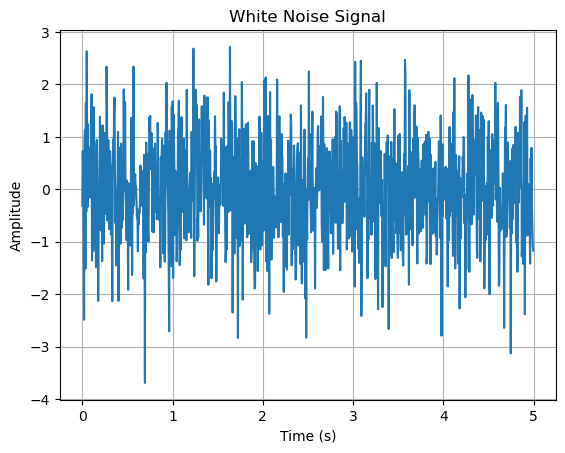

In [10]:
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt

np.random.seed(6) #Apparently changing seed does stuff

N = 1024 #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) #this is awfully convenient

plt.plot(t_arr, white_arr)
plt.title("White Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

I have found that numpy is better than scipy for this, at least the manual for it was clearer. I use numpy for the random normal distribution points and the fast fourier transform, and both are working as I should maybe probably. It is noise, no doubt. Next I will do the fourier transform and plot the real and imaginary parts.

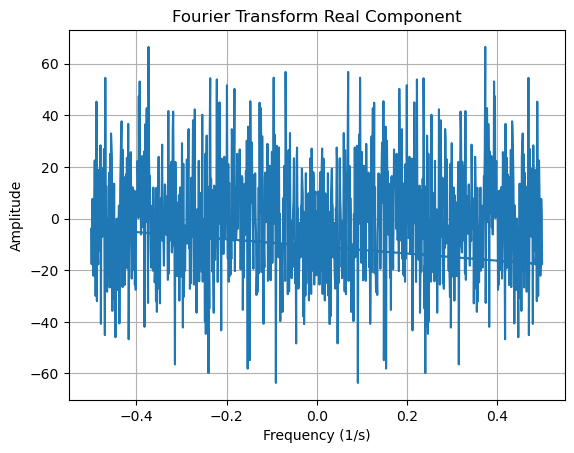

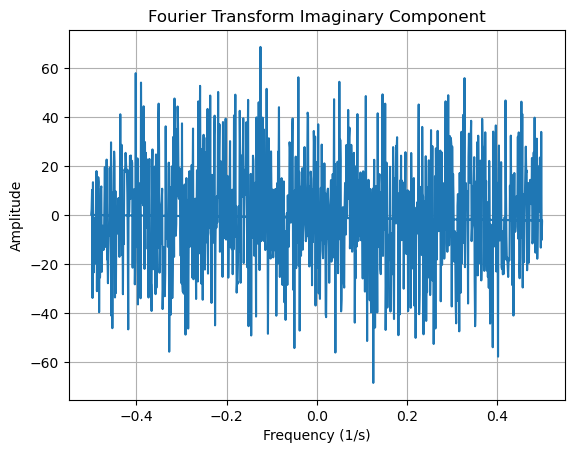

In [11]:
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)
white_fft_Re = np.real(white_fft)
white_fft_Im = np.imag(white_fft)

plt.plot(t_fft, white_fft_Re)
plt.title("Fourier Transform Real Component")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Amplitude") #Not really sure if this is still an amplitude, but whatever
plt.grid(True)
plt.show()

plt.plot(t_fft, white_fft_Im)
plt.title("Fourier Transform Imaginary Component")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Amplitude") #Not really sure if this is still an amplitude, but whatever
plt.grid(True)
plt.show()

This is kinda what I was hoping for; the real part is reflected across the x axis and the imaginary part is reflected across the origin, i.e. the real part is even and the imaginary part is odd. This makes sense I think, so long as there isn't some imaginary mumbo-jumbo happening that I don't know about, just based on what the fourier transform is mathematically. Next up is the power, or |N_fft|^2.

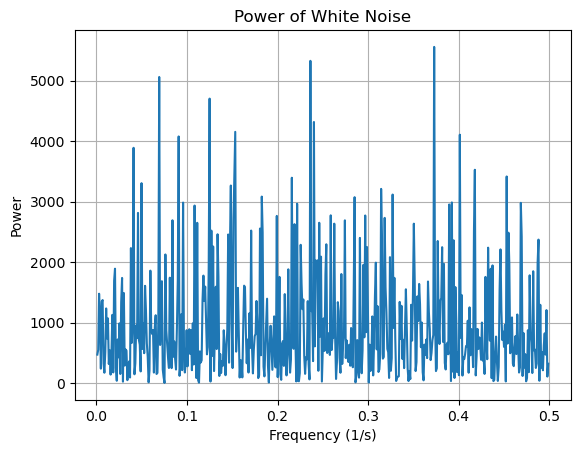

In [12]:
power = np.zeros(len(white_fft))
i = 0
while i < N:
    power[i] = pow(white_fft_Re[i], 2) + pow(white_fft_Im[i], 2)
    i += 1

plt.plot(t_fft[1:N//2], power[1:N//2]) #I'll only look at positive frequencies, meaning I cut the range of both in half
plt.title("Power of White Noise")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)

This is incredibly unsatisfying, but I gUeSS it kind of look crudely constant on average? Only when I vary the seed a lot, which I guess makes sense, but it isn't very conclusive or obvious. Next I will try to make different colors of noise. From what I have read, these different colors of noise vary in their power spectrum, which is not supposted to be constant on average for non-white colors. The first is with pink noise; apparently the power density of pink noise is proportional to the inverse of the frequency. As far as I can tell, there is no other way to create the pink noise spectrum other than scaling the power spectrum using a method called Frequency-Domain Filtering. Below is my attempt at doing that after reading the following article: https://zeptoblog.com/2024/04/21/colored-noise-frequency-domain-filtering.html

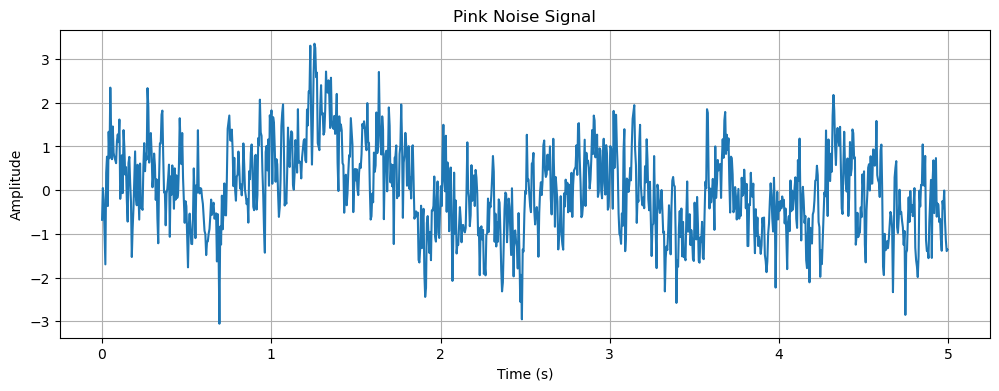

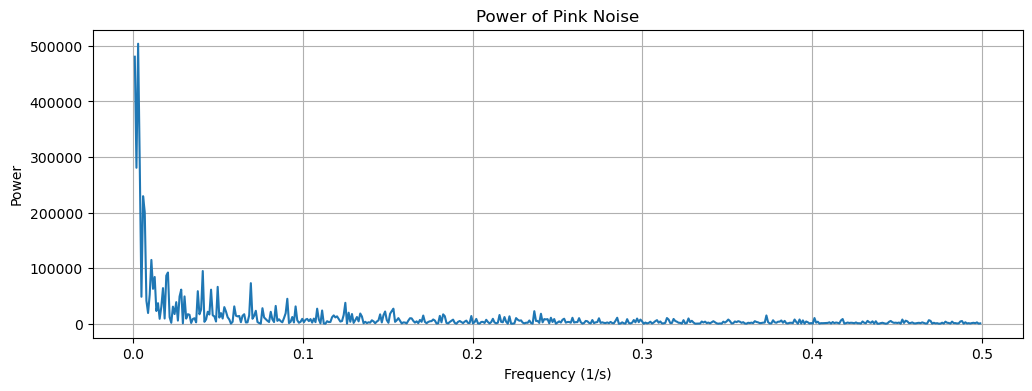

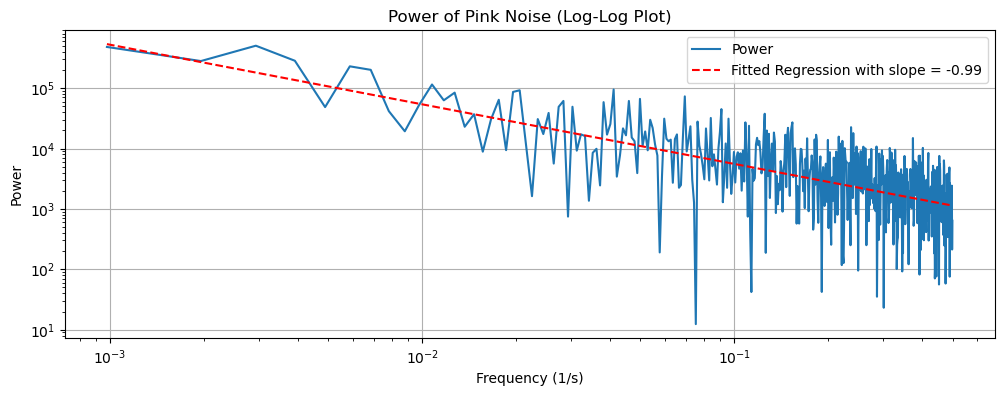

In [6]:
#PINK NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(6) #Apparently changing seed does stuff

N = 1024 #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) #this is awfully convenient
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

pink_fft = white_fft.copy()
pink_fft_Re = np.real(pink_fft)
pink_fft_Im = np.imag(pink_fft)
n = -1 #Power of frequency proportionality

i = 0
while i < N:
    if t_fft[i] == 0:
        pink_fft[i] = 0
    else:
        pink_fft[i] *= pow(np.abs(t_fft[i]), n / 2) #The /2 is here because otherwise the power will have f^(2n) dependence
    i += 1

pink = np.fft.ifft(pink_fft)
pink = (pink - np.mean(pink)) / np.std(pink) #This is to "normalize" it, basically just resizing it
pink_Re = np.real(pink)
pink_Im = np.imag(pink)

plt.figure(figsize=(12, 4))
plt.title("Pink Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_arr, pink_Re)
plt.grid(True)
plt.show()

power_p = np.zeros(len(pink_fft))
i = 0
while i < N:
    power_p[i] = pow(pink_fft_Re[i], 2) + pow(pink_fft_Im[i], 2)
    i += 1

plt.figure(figsize=(12, 4))
plt.plot(t_fft[1:N//2], power_p[1:N//2])
plt.title("Power of Pink Noise")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

#Found this fitting algorithm for a linear regression, and I am logging both axes with only positive values
#so that when it is plotted it will be in the correct scale
slope, intercept, r_value, p_value, std_err = st.linregress(np.log10(np.abs(t_fft[1:N//2])), np.log10(power_p[1:N//2]))

#Now this readjusts it to be in the right scale
fit_line = 10**(intercept + slope * np.log10(np.abs(t_fft[1:N//2])))

plt.figure(figsize=(12, 4))
plt.loglog(t_fft[1:N//2], power_p[1:N//2], label="Power") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.loglog(t_fft[1:N//2], fit_line, '--r', label=f"Fitted Regression with slope = {slope:.2f}") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.title("Power of Pink Noise (Log-Log Plot)")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.show()

This seems to do what it should, and I have included the fit to show what that it is close to what it should be. Next I will produce brown, blue, and purple noise, since all of these are simple changes from the pink case.

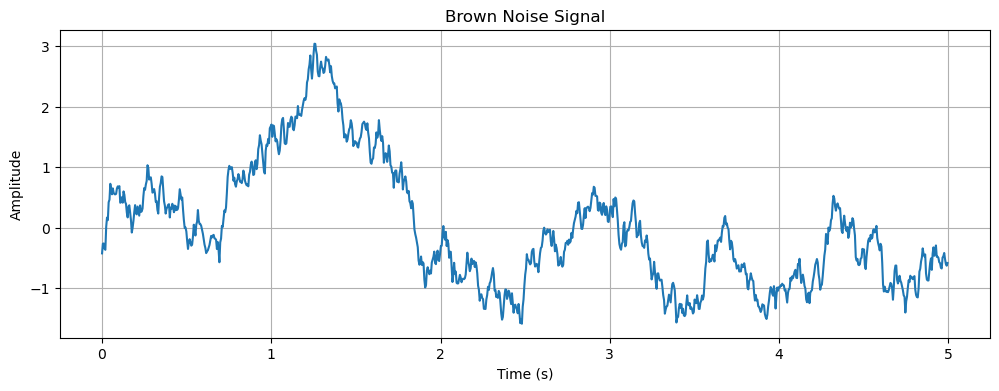

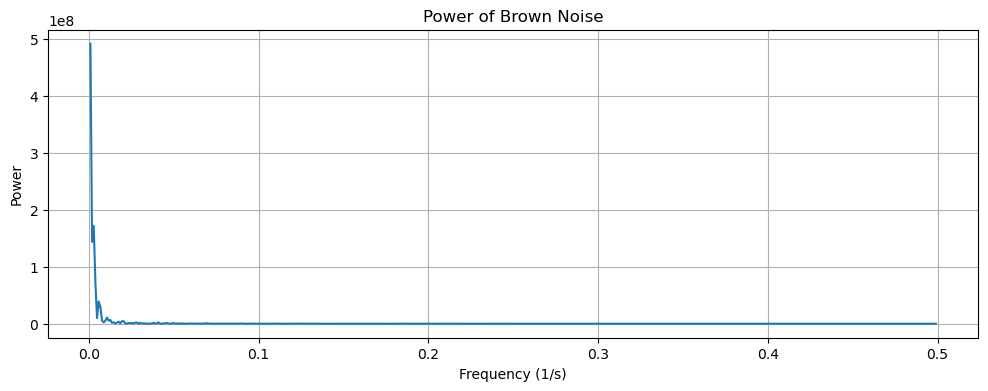

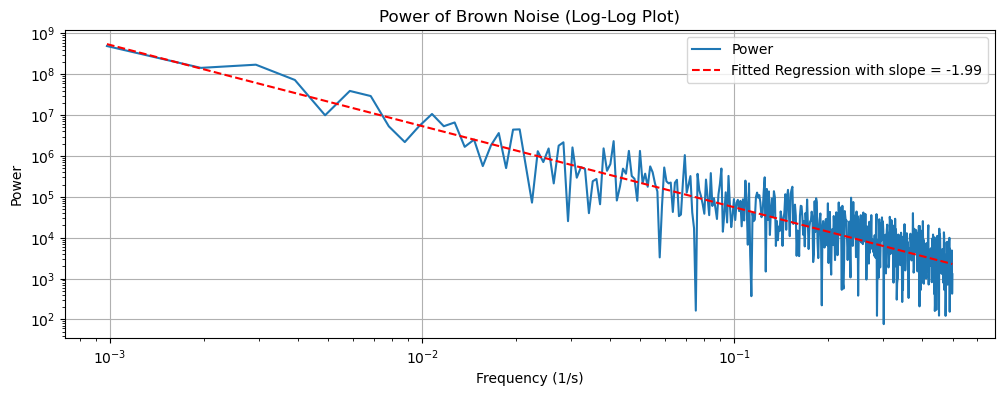

In [7]:
#BROWN NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(6) #Apparently changing seed does stuff

N = 1024 #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) #this is awfully convenient
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

brown_fft = white_fft.copy()
brown_fft_Re = np.real(brown_fft)
brown_fft_Im = np.imag(brown_fft)
n = -2 #Power of frequency proportionality

i = 0
while i < N:
    if t_fft[i] == 0:
        brown_fft[i] = 0
    else:
        brown_fft[i] *= pow(np.abs(t_fft[i]), n / 2) #The /2 is here because otherwise the power will have f^(2n) dependence
    i += 1

brown_arr = np.fft.ifft(brown_fft)
brown_arr = (brown_arr - np.mean(brown_arr)) / np.std(brown_arr)
brown_Re = np.real(brown_arr)
brown_Im = np.imag(brown_arr)

plt.figure(figsize=(12, 4))
plt.title("Brown Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_arr, brown_Re)
plt.grid(True)
plt.show()

power_br = np.zeros(len(brown_fft))
i = 0
while i < N:
    power_br[i] = pow(brown_fft_Re[i], 2) + pow(brown_fft_Im[i], 2)
    i += 1

plt.figure(figsize=(12, 4))
plt.plot(t_fft[1:N//2], power_br[1:N//2])
plt.title("Power of Brown Noise")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

#Found this fitting algorithm for a linear regression, and I am logging both axes with only positive values
#so that when it is plotted it will be in the correct scale
slope, intercept, r_value, p_value, std_err = st.linregress(np.log10(np.abs(t_fft[1:N//2])), np.log10(power_br[1:N//2]))

#Now this readjusts it to be in the right scale
fit_line = 10**(intercept + slope * np.log10(np.abs(t_fft[1:N//2])))

plt.figure(figsize=(12, 4))
plt.loglog(t_fft[1:N//2], power_br[1:N//2], label="Power") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.loglog(t_fft[1:N//2], fit_line, '--r', label=f"Fitted Regression with slope = {slope:.2f}") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.title("Power of Brown Noise (Log-Log Plot)")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.show()

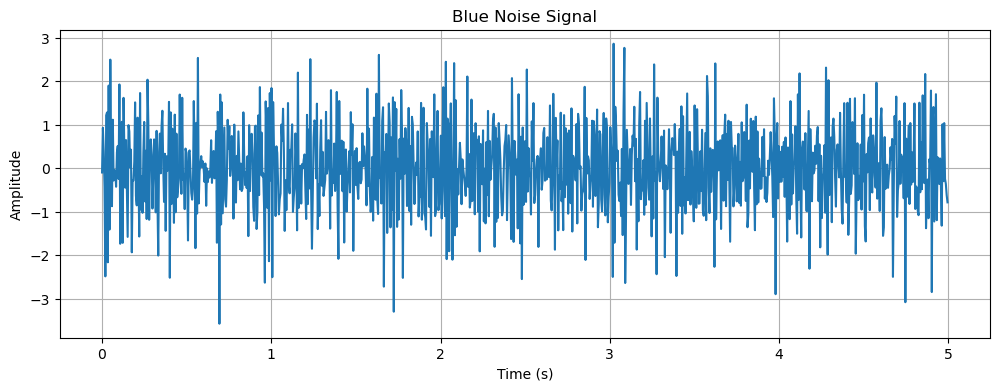

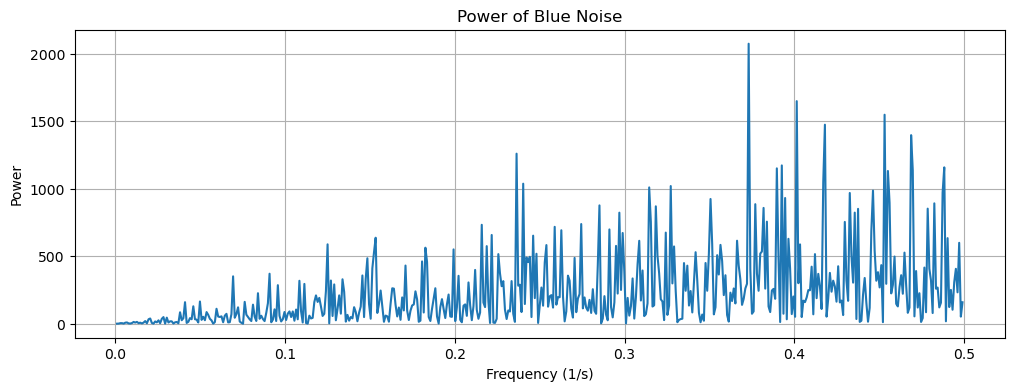

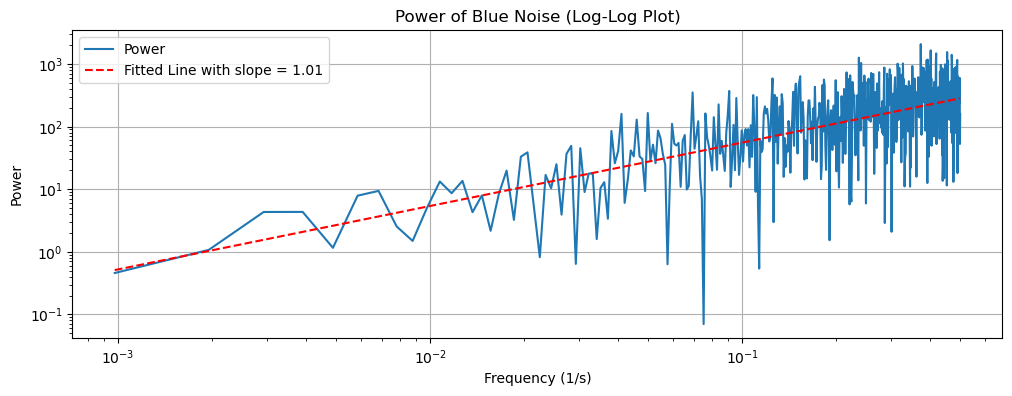

In [8]:
#BLUE NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(6) #Apparently changing seed does stuff

N = 1024 #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) #this is awfully convenient
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

blue_fft = white_fft.copy()
blue_fft_Re = np.real(blue_fft)
blue_fft_Im = np.imag(blue_fft)
n = 1 #Power of frequency proportionality

i = 0
while i < N:
    if t_fft[i] == 0:
        blue_fft[i] = 0
    else:
        blue_fft[i] *= pow(np.abs(t_fft[i]), n / 2) #The /2 is here because otherwise the power will have f^(2n) dependence
    i += 1

blue_arr = np.fft.ifft(blue_fft)
blue_arr = (blue_arr - np.mean(blue_arr)) / np.std(blue_arr)
blue_Re = np.real(blue_arr)
blue_Im = np.imag(blue_arr)

plt.figure(figsize=(12, 4))
plt.title("Blue Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_arr, blue_Re)
plt.grid(True)
plt.show()

power_bl = np.zeros(len(blue_fft))
i = 0
while i < N:
    power_bl[i] = pow(blue_fft_Re[i], 2) + pow(blue_fft_Im[i], 2)
    i += 1

plt.figure(figsize=(12, 4))
plt.plot(t_fft[1:N//2], power_bl[1:N//2])
plt.title("Power of Blue Noise")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

#Found this fitting algorithm for a linear regression, and I am logging both axes with only positive values
#so that when it is plotted it will be in the correct scale; apparently also works with positive slopes
slope, intercept, r_value, p_value, std_err = st.linregress(np.log10(np.abs(t_fft[1:N//2])), np.log10(power_bl[1:N//2]))

#Now this readjusts it to be in the right scale
fit_line = 10**(intercept + slope * np.log10(np.abs(t_fft[1:N//2])))

plt.figure(figsize=(12, 4))
plt.loglog(t_fft[1:N//2], power_bl[1:N//2], label="Power") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.loglog(t_fft[1:N//2], fit_line, '--r', label=f"Fitted Line with slope = {slope:.2f}") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.title("Power of Blue Noise (Log-Log Plot)")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.show()

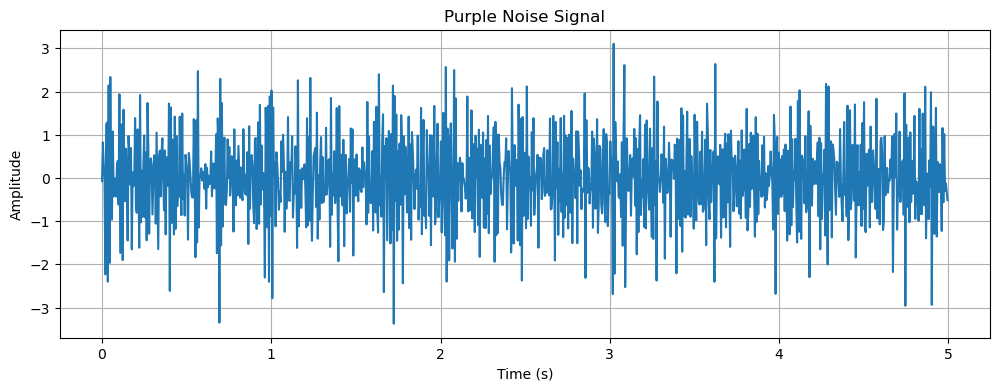

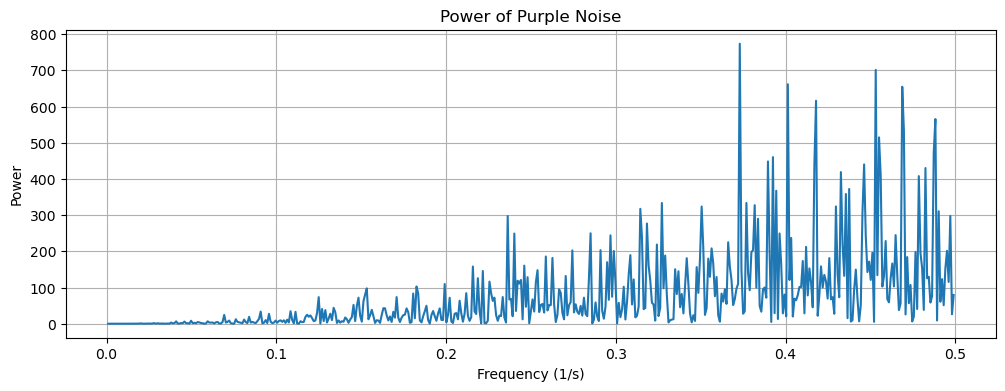

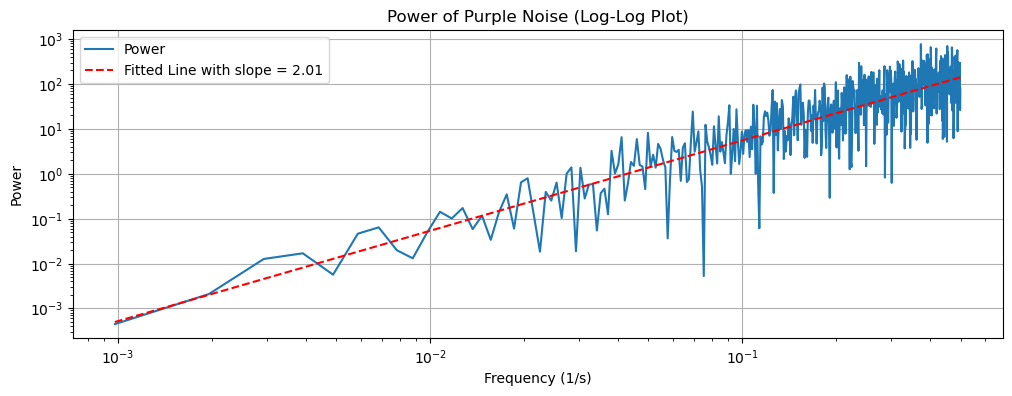

In [9]:
#PURPLE NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(6) #Apparently changing seed does stuff

N = 1024 #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) #this is awfully convenient
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

purple_fft = white_fft.copy()
purple_fft_Re = np.real(purple_fft)
purple_fft_Im = np.imag(purple_fft)
n = 2 #Power of frequency proportionality

i = 0
while i < N:
    if t_fft[i] == 0:
        purple_fft[i] = 0
    else:
        purple_fft[i] *= pow(np.abs(t_fft[i]), n / 2) #The /2 is here because otherwise the power will have f^(2n) dependence
    i += 1

purple_arr = np.fft.ifft(purple_fft)
purple_arr = (purple_arr - np.mean(purple_arr)) / np.std(purple_arr)
purple_Re = np.real(purple_arr)
purple_Im = np.imag(purple_arr)

plt.figure(figsize=(12, 4))
plt.title("Purple Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t_arr, purple_Re)
plt.grid(True)
plt.show()

power_bp = np.zeros(len(purple_fft))
i = 0
while i < N:
    power_bp[i] = pow(purple_fft_Re[i], 2) + pow(purple_fft_Im[i], 2)
    i += 1

plt.figure(figsize=(12, 4))
plt.plot(t_fft[1:N//2], power_bp[1:N//2])
plt.title("Power of Purple Noise")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

#Found this fitting algorithm for a linear regression, and I am logging both axes with only positive values
#so that when it is plotted it will be in the correct scale; apparently also works with positive slopes
slope, intercept, r_value, p_value, std_err = st.linregress(np.log10(np.abs(t_fft[1:N//2])), np.log10(power_bp[1:N//2]))

#Now this readjusts it to be in the right scale
fit_line = 10**(intercept + slope * np.log10(np.abs(t_fft[1:N//2])))

plt.figure(figsize=(12, 4))
plt.loglog(t_fft[1:N//2], power_bp[1:N//2], label="Power") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.loglog(t_fft[1:N//2], fit_line, '--r', label=f"Fitted Line with slope = {slope:.2f}") #Using only positive non-zero values, because I have to exclude zero and this seems like the way to do that
plt.title("Power of Purple Noise (Log-Log Plot)")
plt.xlabel("Frequency (1/s)")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.show()

These are all good, now I will attempt to make these signals into audio files, starting with the white.

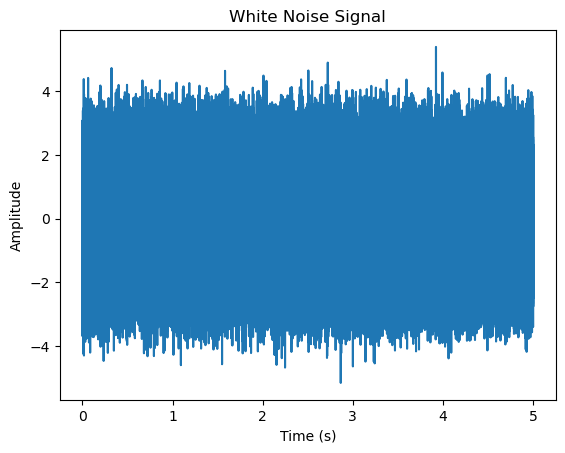

In [259]:
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt

from scipy.io.wavfile import write
from scipy.signal import resample  #Found these libraries that are in scipy that are specifically designed for this... how convenient

np.random.seed(6)

N = pow(2, 21) #Number of points
std = 1
mean = 0
white_arr = np.random.normal(mean, std, N) 
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = (white_arr - np.mean(white_arr)) / np.std(white_arr)
t_fft = np.fft.fftfreq(N)

plt.plot(t_arr, white_arr)
plt.title("White Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

#This is where the weirdness comes in. Apparently the white_arr must be reshaped such that it can be written to a .wav file
#This is done by first defining a sample rate, and this one is for HD
samplerate = 44100

#Then, you "resample the data set" using this function from scipy, which is designed for this purpose
#The second entry in this function is the required duration times the sample rate
white = resample(white_arr, 5 * samplerate)

#Then penultimately you convert THIS thing into a computer-friendly 16-bit version of itself using this
#This 32767 number is the largest number that can be represented in this 16-bit audio file (from what I've read)
white_audio = np.int16(white * 32767)

#Finally you write this to a .wav file using yet another function from scipy
write("white_noise.wav", samplerate, white_audio)

This admittedly was very difficult for me to write, and honestly I don't really understand what is happening, but now that it actually makes the sound files I can move on to make the rest of the files. Side note, I had to increase the N to 2^21 so that the noise was clearer. Moving on, here is some code to generate the remaining .wav files for pink, brown, blue, and purple noise.

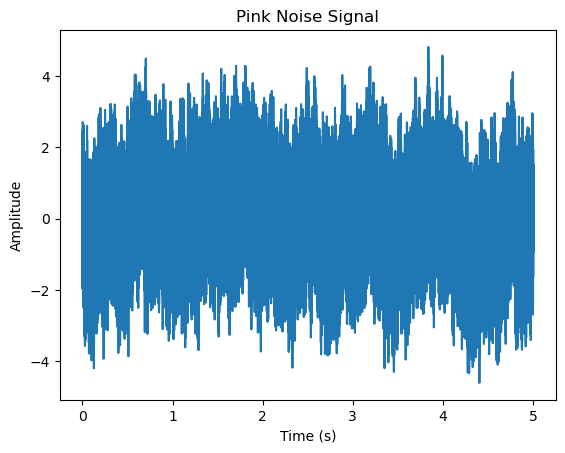

In [260]:
#PINK NOISE; SUPPOSED TO SOUND LIKE THE OCEAN, DEEPER THAN WHITE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import resample

np.random.seed(6)

N = pow(2, 21) #Number of points
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) 
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

pink_fft = white_fft.copy()
n = -1 #Power of frequency proportionality

i = 0
while i < N:
    if t_fft[i] == 0:
        pink_fft[i] = 0
    else:
        pink_fft[i] *= pow(np.abs(t_fft[i]), n / 2) #The /2 is here because otherwise the power will have f^(2n) dependence
    i += 1

pink_arr = np.fft.ifft(pink_fft)
pink_Re = np.real(pink_arr)
pink_Re = (pink_Re - np.mean(pink_Re)) / np.std(pink_Re)

plt.plot(t_arr, pink_Re)
plt.title("Pink Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

samplerate = 44100
pink_Re = resample(pink_Re, 5 * samplerate)
pink_audio = np.int16(pink_Re * 32767)
write("pink_noise.wav", samplerate, pink_audio)


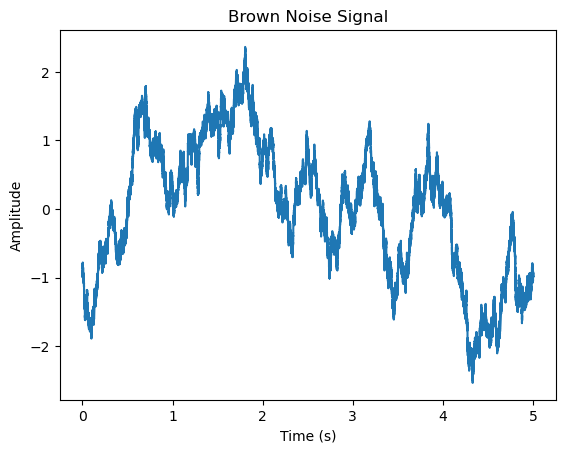

In [261]:
#BROWN NOISE; SUPPOSED TO SOUND LIKE A RUMBLE, DEEPER THAN PINK
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import resample

np.random.seed(6)

N = pow(2, 21)
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) 
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

brown_fft = white_fft.copy()
n = -2

i = 0
while i < N:
    if t_fft[i] == 0:
        brown_fft[i] = 0
    else:
        brown_fft[i] *= pow(np.abs(t_fft[i]), n / 2)
    i += 1

brown_arr = np.fft.ifft(brown_fft)
brown_Re = np.real(brown_arr)
brown_Re = (brown_Re - np.mean(brown_Re)) / np.std(brown_Re)

plt.plot(t_arr, brown_Re)
plt.title("Brown Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

samplerate = 44100
brown_Re = resample(brown_Re, 5 * samplerate)
brown_audio = np.int16(brown_Re * 32767)
write("brown_noise.wav", samplerate, brown_audio)


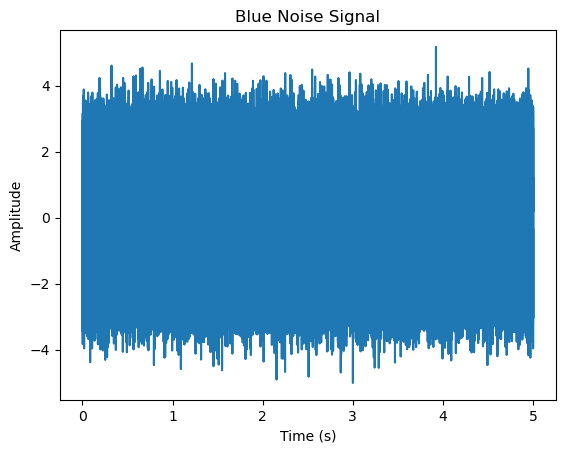

In [262]:
#BLUE NOISE; SUPPOSED TO SOUND LIGHTER THAN WHITE NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import resample

np.random.seed(6)

N = pow(2, 21)
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) 
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

blue_fft = white_fft.copy()
n = 1

i = 0
while i < N:
    blue_fft[i] *= pow(np.abs(t_fft[i]), n / 2)
    i += 1

blue_arr = np.fft.ifft(blue_fft)
blue_Re = np.real(blue_arr)
blue_Re = (blue_Re - np.mean(blue_Re)) / np.std(blue_Re)

plt.plot(t_arr, blue_Re)
plt.title("Blue Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

samplerate = 44100
blue_Re = resample(blue_Re, 5 * samplerate)
blue_audio = np.int16(blue_Re * 32767)
write("blue_noise.wav", samplerate, blue_audio)


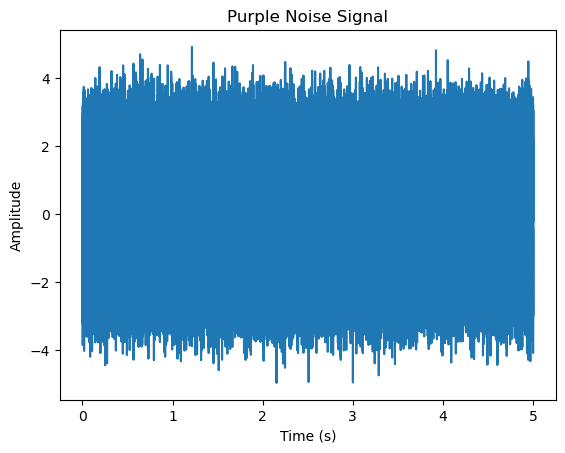

In [263]:
#PURPLE NOISE; SUPPOSED TO SOUND LIGHTER THAN BLUE NOISE
%reset -f
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import resample

np.random.seed(6)

N = pow(2, 21)
std = 1
mean = 0
t_arr = np.linspace(0, 5, N, endpoint=False)
white_arr = np.random.normal(mean, std, N) 
t_fft = np.fft.fftfreq(N)
white_fft = np.fft.fft(white_arr)

purple_fft = white_fft.copy()
n = 2

i = 0
while i < N:
    purple_fft[i] *= pow(np.abs(t_fft[i]), n / 2)
    i += 1

purple_arr = np.fft.ifft(purple_fft)
purple_Re = np.real(purple_arr)
purple_Re = (purple_Re - np.mean(purple_Re)) / np.std(purple_Re)

plt.plot(t_arr, purple_Re)
plt.title("Purple Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

samplerate = 44100
purple_Re = resample(purple_Re, 5 * samplerate)
purple_audio = np.int16(purple_Re * 32767)
write("purple_noise.wav", samplerate, purple_audio)
